<a href="https://colab.research.google.com/github/19pa1a05c7/clustering-with-kmeans/blob/master/copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [158]:
d1=pd.read_csv("covid1.csv")
d2=pd.read_csv("covid2.csv")
d3=pd.read_csv("covid3.csv")
d4=pd.read_csv("covid4.csv")
d5=pd.read_csv("covid5.csv")
d6=pd.read_csv("covid6.csv")
d7=pd.read_csv("covid7.csv")
d8=pd.read_csv("01-29-2020.csv")
d9=pd.read_csv("01-30-2020.csv")
d10=pd.read_csv("01-31-2020.csv")
d11=pd.read_csv("02-01-2020.csv")
d12=pd.read_csv("02-02-2020.csv")
d13=pd.read_csv("02-03-2020.csv")
d14=pd.read_csv("02-04-2020.csv")
d15=pd.read_csv("02-05-2020.csv")
d16=pd.read_csv("02-06-2020.csv")
d17=pd.read_csv("02-07-2020.csv")
d18=pd.read_csv("02-08-2020.csv")
d19=pd.read_csv("02-09-2020.csv")
d20=pd.read_csv("02-10-2020.csv")
d21=pd.read_csv("02-11-2020.csv")
d22=pd.read_csv("02-12-2020.csv")
d23=pd.read_csv("02-13-2020.csv")
d24=pd.read_csv("02-14-2020.csv")
d25=pd.read_csv("02-15-2020.csv")
d26=pd.read_csv("02-16-2020.csv")
d27=pd.read_csv("02-17-2020.csv")
d28=pd.read_csv("02-18-2020.csv")
d29=pd.read_csv("02-19-2020.csv")
d30=pd.read_csv("02-20-2020.csv")
d31=pd.read_csv("02-21-2020.csv")
d32=pd.read_csv("02-22-2020.csv")
d33=pd.read_csv("02-23-2020.csv")
d34=pd.read_csv("02-24-2020.csv")
d35=pd.read_csv("02-25-2020.csv")
d36=pd.read_csv("02-26-2020.csv")
d37=pd.read_csv("02-27-2020.csv")
d38=pd.read_csv("02-28-2020.csv")
d39=pd.read_csv("02-29-2020.csv")
d40=pd.read_csv("03-01-2020.csv")
d41=pd.read_csv("03-02-2020.csv")
d42=pd.read_csv("03-03-2020.csv")
d43=pd.read_csv("03-04-2020.csv")
d44=pd.read_csv("03-05-2020.csv")
d45=pd.read_csv("03-06-2020.csv")
d46=pd.read_csv("03-07-2020.csv")
d47=pd.read_csv("03-08-2020.csv")
d48=pd.read_csv("03-09-2020.csv")
d49=pd.read_csv("03-10-2020.csv")
d50=pd.read_csv("03-11-2020.csv")
d51=pd.read_csv("03-12-2020.csv")
d52=pd.read_csv("03-13-2020.csv")
d53=pd.read_csv("03-14-2020.csv")
d54=pd.read_csv("03-15-2020.csv")
d55=pd.read_csv("03-16-2020.csv")
d56=pd.read_csv("03-17-2020.csv")
d57=pd.read_csv("03-18-2020.csv")
d58=pd.read_csv("03-19-2020.csv")
d59=pd.read_csv("03-20-2020.csv")
d60=pd.read_csv("03-21-2020.csv")
frame=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d56,d57,d58,d59,d60]
covid=pd.concat(frame)
covid


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
0,1.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Anhui,NaN
1,14.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Beijing,NaN
2,6.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Chongqing,NaN
3,1.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Fujian,NaN
4,NaN,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Gansu,NaN
...,...,...,...,...,...,...,...,...
299,0.0,Jersey,0.0,2020-03-17T18:33:03,49.1900,-2.110,NaN,0.0
300,0.0,Puerto Rico,0.0,2020-03-17T16:13:14,18.2000,-66.500,NaN,0.0
301,0.0,Republic of the Congo,0.0,2020-03-17T21:33:03,-1.4400,15.556,NaN,0.0
302,0.0,The Bahamas,0.0,2020-03-19T12:13:38,24.2500,-76.000,NaN,0.0


In [0]:
covid["Confirmed"].fillna(0,inplace=True) 
covid["Deaths"].fillna(0,inplace=True)
covid["Recovered"].fillna(0,inplace=True)
covid["Province/State"].fillna(covid["Province/State"].mode()[0],inplace=True)

In [160]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7345 entries, 0 to 303
Data columns (total 8 columns):
Confirmed         7345 non-null float64
Country/Region    7345 non-null object
Deaths            7345 non-null float64
Last Update       7345 non-null object
Latitude          4527 non-null float64
Longitude         4527 non-null float64
Province/State    7345 non-null object
Recovered         7345 non-null float64
dtypes: float64(5), object(3)
memory usage: 516.4+ KB


In [161]:
covid19=covid.iloc[:,[6,0,2,7]]
covid19

,Province/State,Confirmed,Deaths,Recovered
0,Anhui,1.0,0.0,0.0
1,Beijing,14.0,0.0,0.0
2,Chongqing,6.0,0.0,0.0
3,Fujian,1.0,0.0,0.0
4,Gansu,0.0,0.0,0.0
...,...,...,...,...
299,Gansu,0.0,0.0,0.0
300,Gansu,0.0,0.0,0.0
301,Gansu,0.0,0.0,0.0
302,Gansu,0.0,0.0,0.0


In [162]:
covid19 = covid19.groupby('Province/State').agg(np.sum).reset_index()
covid19

,Province/State,Confirmed,Deaths,Recovered
0,"Montreal, QC",17.0,0.0,0.0
1,"Norfolk County, MA",7.0,0.0,0.0
2,Alabama,400.0,0.0,0.0
3,"Alameda County, CA",6.0,0.0,0.0
4,Alaska,47.0,0.0,0.0
...,...,...,...,...
278,Wyoming,93.0,0.0,0.0
279,Xinjiang,3295.0,87.0,1863.0
280,"Yolo County, CA",4.0,0.0,0.0
281,Yunnan,8286.0,61.0,5110.0


In [163]:
covid19.columns

Index(['Province/State', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [164]:
x=covid19.iloc[:,1:4].values
x

array([[1.700000e+01, 0.000000e+00, 0.000000e+00],
       [7.000000e+00, 0.000000e+00, 0.000000e+00],
       [4.000000e+02, 0.000000e+00, 0.000000e+00],
       [6.000000e+00, 0.000000e+00, 0.000000e+00],
       [4.700000e+01, 0.000000e+00, 0.000000e+00],
       [7.800000e+02, 2.000000e+00, 0.000000e+00],
       [4.467700e+04, 2.330000e+02, 2.873700e+04],
       [3.520000e+02, 1.000000e+00, 7.000000e+00],
       [3.760000e+02, 0.000000e+00, 0.000000e+00],
       [1.400000e+01, 0.000000e+00, 0.000000e+00],
       [1.100000e+01, 0.000000e+00, 0.000000e+00],
       [2.700000e+01, 0.000000e+00, 0.000000e+00],
       [1.700000e+01, 0.000000e+00, 0.000000e+00],
       [1.947900e+04, 2.580000e+02, 9.835000e+03],
       [1.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.600000e+01, 0.000000e+00, 0.000000e+00],
       [4.000000e+00, 0.000000e+00, 0.000000e+00],
       [2.000000e+00, 0.000000e+00, 0.000000e+00],
       [6.000000e+00, 0.000000e+00, 0.000000e+00],
       [3.400000e+01, 0.000000e

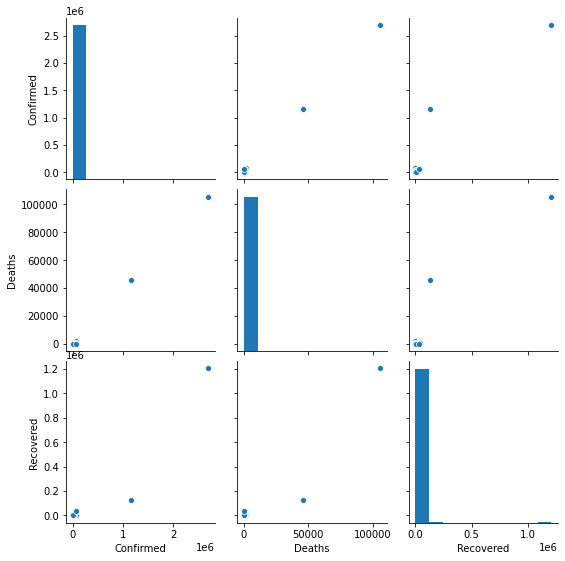

In [168]:
import seaborn as sns
sns.pairplot(covid19,kind="scatter")
plt.show()

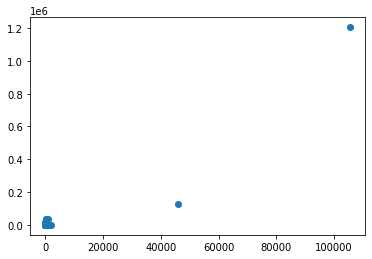

In [166]:
plt.scatter(x[:,1],x[:,2])

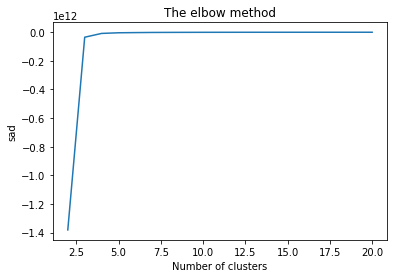

In [167]:
sad = []

for i in range(2, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sad.append(kmeans.score(x))
plt.plot(range(2,21),sad)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('sad')
plt.show()


In [169]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

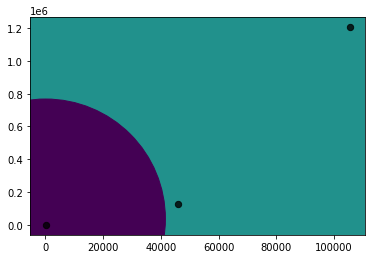

In [171]:
plt.scatter(x[:, 1], x[:, 2], c=y_kmeans, s=x[:,0],cmap="viridis")
cen=kmeans.cluster_centers_
plt.scatter(cen[:,1],cen[:,2],c="black",s=40,alpha=0.8)

In [172]:
cen=kmeans.cluster_centers_
cen

array([[2.95522776e+03, 3.15302491e+01, 1.32373665e+03],
       [2.69148700e+06, 1.05501000e+05, 1.20494100e+06],
       [1.15719500e+06, 4.61230000e+04, 1.30508000e+05]])